<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/CV_Task2_OCR_fair_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
cd /content/gdrive/My Drive/Computer_Vision

/content/gdrive/My Drive/Computer_Vision


In [70]:
print(cv2.imread("a.jpg",0).shape)
print(cv2.imread("b_new.jpg",0).shape)
print(cv2.imread("c_.pgm",0).shape)

(62, 55)
(20, 16)
(54, 37)


In [0]:
import argparse
import copy
import os
import cv2
import numpy as np
import utils
from task1 import *
from matplotlib import pyplot as plt

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product
  
def ncc(image,temp):
  import numpy as np
  t_np=np.array(temp)
  i_np=np.array(image)
  t_np=t_np/t_np.sum()
  i_l=len(image)
  i_b=len(image[0])
  t_l=len(temp)
  t_b=len(temp[0])
  ncc_mat=np.zeros((i_l-t_l+1,i_b-t_b+1)).tolist()
  for i in range(i_l-t_l+1):
    for j in range(i_b-t_b+1):
      ncc_mat[i][j]=correlation_coefficient(i_np[i:i+t_l,j:j+t_b],t_np)
  return(ncc_mat)


In [0]:
matches=[]
img_path='proj1-task2-png.png'
gaussian=np.matmul(np.array([[1],[2],[1]]),np.array([[1,2,1]]))
img=read_image(img_path)
img_noise_reduced=convolve2d(img,gaussian)

template = cv2.imread("a.jpg",0)
resized = normalize(cv2.resize(template, (11,11), interpolation=cv2.INTER_LINEAR).tolist())
resized_threshold=copy.deepcopy(resized)
for i in range(len(resized)):
  for j in range(len(resized[0])):
    if resized[i][j]<100:
      resized_threshold[i][j]=0
    else:
      resized_threshold[i][j]=255
img_ncc=ncc(img_noise_reduced,resized_threshold)
img_ncc_np=np.array(img_ncc)
matches=matches+np.argwhere(img_ncc_np > 0.57).tolist()

resized = normalize(cv2.resize(template, (18,18), interpolation=cv2.INTER_LINEAR).tolist())
resized_threshold=copy.deepcopy(resized)
for i in range(len(resized)):
  for j in range(len(resized[0])):
    if resized[i][j]<100:
      resized_threshold[i][j]=0
    else:
      resized_threshold[i][j]=255
img_ncc=ncc(img_noise_reduced,resized_threshold)
img_ncc_np=np.array(img_ncc)
matches=matches+(np.argwhere(img_ncc_np > 0.65).tolist())

In [0]:
# Lets check for template b
matches=[]
img_path='proj1-task2-png.png'
gaussian=np.matmul(np.array([[1],[2],[1]]),np.array([[1,2,1]]))
img=read_image(img_path)
img_noise_reduced=convolve2d(img,gaussian)

template = cv2.imread("b_new.jpg",0)
# resized = normalize(cv2.resize(template, (14,9), interpolation=cv2.INTER_LINEAR).tolist())
resized=template
resized_threshold=copy.deepcopy(resized)
for i in range(len(resized)):
  for j in range(len(resized[0])):
    if resized[i][j]<130:
      resized_threshold[i][j]=0
    else:
      resized_threshold[i][j]=255
img_ncc=ncc(img_noise_reduced,resized_threshold)
img_ncc_np=np.array(img_ncc)
matches=matches+np.argwhere(img_ncc_np > 0.7).tolist()

In [0]:
# Lets check for template c
matches=[]
img_path='proj1-task2-png.png'
gaussian=[[1,2,1],[2,4,2],[1,2,1]]
img=read_image(img_path)
img_noise_reduced=convolve2d(img,gaussian)

template = cv2.imread("c_.pgm",0)
resized = normalize(cv2.resize(template, (10,10), interpolation=cv2.INTER_LINEAR).tolist())
# resized=template
resized_threshold=copy.deepcopy(resized)
for i in range(len(resized)):
  for j in range(len(resized[0])):
    if resized[i][j]<100:
      resized_threshold[i][j]=0
    else:
      resized_threshold[i][j]=255
img_ncc=ncc(img_noise_reduced,resized_threshold)
img_ncc_np=np.array(img_ncc)
matches=matches+np.argwhere(img_ncc_np > 0.52).tolist()

In [0]:
# Look at the size of the template and identify the alphabet => customize the cutoff based on that => Poka Poka!

In [48]:
matches

[[13, 152],
 [13, 153],
 [13, 169],
 [13, 170],
 [36, 91],
 [58, 121],
 [58, 227],
 [81, 88],
 [81, 150],
 [132, 170],
 [132, 215],
 [154, 122],
 [154, 164],
 [177, 79],
 [177, 155],
 [199, 84],
 [199, 150],
 [199, 167],
 [102, 151]]

In [33]:
np.argwhere(img_ncc_np > 0.47).tolist()

[[244, 195], [257, 116]]

In [30]:
mx=0
for i in range(len(img_ncc)):
  for j in range(len(img_ncc[0])):
    if img_ncc[i][j]>mx:
      mx=img_ncc[i][j]
      l=i
      b=j

print(mx,l,b)

0.4769519010464957 35 136


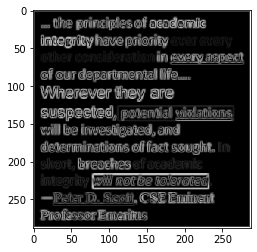

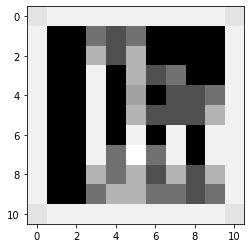

In [44]:
plt.imshow(img_noise_reduced_edges, cmap="gray")
plt.show()

plt.imshow(resized_threshold_edges, cmap="gray")
plt.show()

In [43]:
cv2.imwrite('cv2save.jpg', resized_threshold_edges)

TypeError: ignored

In [41]:
pwd

'/content/gdrive/My Drive/Computer_Vision'